<a href="https://colab.research.google.com/github/fdzr/Data-Mining/blob/master/classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC, LinearSVR
from sklearn.tree import DecisionTreeClassifier, export_graphviz, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

import matplotlib.pyplot as plt


In [ ]:
iris = datasets.load_iris()

In [ ]:
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [ ]:
X = iris["data"][:, 3:]
y = (iris["target"] == 2).astype(np.int)

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

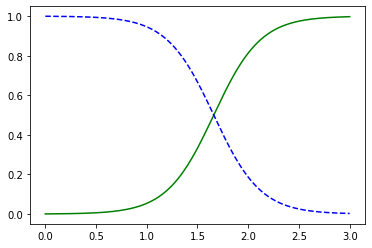

In [ ]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not iris virginica")

In [ ]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

In [ ]:
X = iris["data"][:, (2, 3)]
y = (iris["target"] == 2).astype(np.float64)

In [ ]:
svm_clf = Pipeline([
                    ("scaler", StandardScaler()),
                    ("linear_svc", LinearSVC(C=1, loss="hinge"))
])
svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [ ]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

In [ ]:
X, y = make_moons(n_samples=100, noise=0.15)

In [ ]:
polynomial_svm_clf = Pipeline([
                ("poly_features", PolynomialFeatures(degree=3)),
                ("scaler", StandardScaler()),
                ("svm_clf", LinearSVC(C=10, loss="hinge"))
])
polynomial_svm_clf.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

In [ ]:
poly_kernel_svm_clf = Pipeline([
                    ("scaler", StandardScaler()),
                    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5)),
])

In [ ]:
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [ ]:
rbf_kernel_svm_clf = Pipeline([
                            ("scaler", StandardScaler()),
                            ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

In [ ]:
svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X, y)

LinearSVR(epsilon=1.5)

In [ ]:
X = iris.data[:, 2:]
y = iris.target

In [ ]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

In [ ]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [ ]:
tree_clf.predict([[5, 1.5]])

array([1])

In [ ]:
tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2)

In [2]:
X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

In [ ]:
voting_clf = VotingClassifier(
    estimators=[("lr", log_clf), ("rf", rnd_clf), ("svc", svm_clf)],
    voting="hard"
)

In [ ]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()), ('svc', SVC())])

In [ ]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.904


In [5]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=100,
    bootstrap=True,
    n_jobs=-1
)

In [6]:
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [9]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators=500,
    bootstrap=True,
    n_jobs=-1,
    oob_score=True
)

In [10]:
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.8933333333333333

In [11]:
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.896

In [14]:
bag_clf.oob_decision_function_

array([[0.36787565, 0.63212435],
       [0.40449438, 0.59550562],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.12290503, 0.87709497],
       [0.31666667, 0.68333333],
       [0.02702703, 0.97297297],
       [0.9895288 , 0.0104712 ],
       [0.98360656, 0.01639344],
       [0.76470588, 0.23529412],
       [0.00985222, 0.99014778],
       [0.75806452, 0.24193548],
       [0.86772487, 0.13227513],
       [0.98360656, 0.01639344],
       [0.05235602, 0.94764398],
       [0.        , 1.        ],
       [0.98285714, 0.01714286],
       [0.94512195, 0.05487805],
       [0.98453608, 0.01546392],
       [0.01604278, 0.98395722],
       [0.34158416, 0.65841584],
       [0.93063584, 0.06936416],
       [1.        , 0.        ],
       [0.96791444, 0.03208556],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.65269461, 0.34730539],
       [0.

In [15]:
rnd_clf = RandomForestClassifier(n_estimators=500,
                                 max_leaf_nodes=16,
                                 n_jobs=-1)
rnd_clf.fit(X_train, y_train)                            

RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1)

In [18]:
y_pred_rf = rnd_clf.predict(X_test)

In [19]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter="random",
                           max_leaf_nodes=16),
                            n_estimators=500,
                            max_samples=-1,
                            bootstrap=True,
                            n_jobs=-1
) # the equivalent code to randomforestclassifier code